# Maximum Likelihood Estimation


In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats, integrate

sns.set(color_codes=True)

random_sample = norm.rvs(loc=0, scale=1, size=500) 
print(random_sample[0:10])

[ 0.50209929  0.91827129  0.63038402 -1.21881538  1.02398897  1.34050065
 -0.95855249  2.28199506  2.53979574 -0.14300426]


## Fitting the Distribution by MLE

* norm.fit(data) provides two parameters, mean & variance
* mean -> parameters[0] 
* std -> parameters[1]

In [5]:
parameters = norm.fit(random_sample)

In [6]:
x = np.linspace(-5, 5, 100)

In [7]:
# Generate the pdf (fitted distribution)
pdf_hypothesis = []

for i in range(1, 20):
    delta = 0.1
    pdf_hypothesis.append(norm.pdf(x, loc = parameters[0] - delta, scale = parameters[1]))
    pdf_hypothesis.append(norm.pdf(x, loc = parameters[0] + delta, scale = parameters[1]))
    delta += 0.1

# Generate the pdf (normal distribution non fitted)

In [8]:
normal_pdf = norm.pdf(x)

# Plotting various realizations of Normal Distributions

Let us plot various distributions to see how the MLE is the best estimate out of all other means or variances. This is not considering the biased/unbiased estimates of variance but to illustrate how another gaussian would not fit the histogram of gaussian distribution.

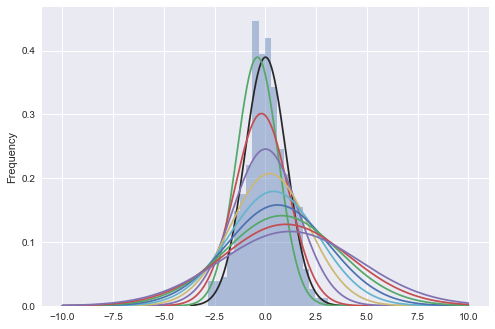

In [25]:
x = np.random.normal(0, scale =1, size=500)

g = sns.distplot(x, kde=False, fit=stats.norm);

(mu, sigma) = stats.norm.fit(x)

plt.ylabel('Frequency')

x_axis = np.linspace(-10, 10, 500)

n_hyp = 1
mu_hyp = mu - 0.4
sigma_hyp = sigma

while n_hyp < 10:
    g.plot(x_axis, stats.norm.pdf(x_axis, mu_hyp, sigma_hyp))
    mu_hyp = mu_hyp + 0.2
    sigma_hyp = sigma_hyp + 0.3
    n_hyp = n_hyp + 1
    
sns.plt.show()

You can observe that only the black curve denoting the gaussian normal curve of the means and variances estimated by MLE is the perfect fit.

## Log Likelihood

The log-likelihood with mean μ and std σ is defined as:

$$L(μ, σ)=−\frac{N}{2}log(2πσ^2)−\sum\limits_{n=1}^N \frac{(x_n−μ)^2}{2σ^2}$$ 

## Exercise

Given the above equation, compute the log-likelihood for all the above datasets.
* Increase the means in a range from (mean - 0.8) to 20 samples in steps of 2. 
* Increase the std. as well from (sigma - 0.8) in steps of 0.2 for 20 samples.
* Plot the log-likelihood.
* Assign the log-likelihood values to a list ll_list.

# Solution

In [26]:
def log_likelihood(x, mu, sigma):
    '''
    Computes the log likelihood of the data for a gaussian random variable.
    Args:
        x (list): List of Xi of normally distributed datapoints.
        mu (float): Mean
        sigma (float): Variance
    Returns;
        (float) : Log Likelihood value.
        
    '''
    n = len(x)
    const = (-n/2)*np.log(2*np.pi*np.square(sigma))
    var = 0
    for x_i in x:
        var = var + np.square(x_i - mu)
        
    var = (-0.5/np.square(sigma))*var
    ll_value = const + var
    return ll_value

### Plot the log-likelihood

Let us now plot the log-likelihood for the various means, variances on x-axis.

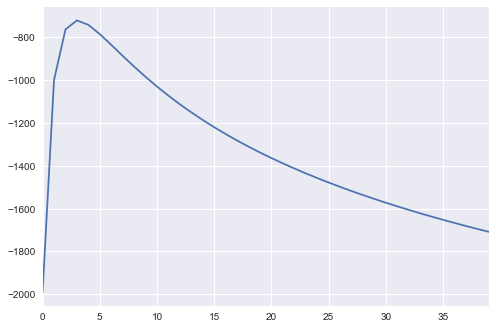

In [28]:
ll_list = []
sigma_hyp = sigma - 0.8
mean_hyp = mu - 0.8

# Hypothesis means, variances.
n_hyp = 40

while n_hyp > 0:
    mean_hyp = mean_hyp + 0.2
    sigma_hyp = sigma_hyp + 0.2
    ll_list.append((log_likelihood(x, mean_hyp, sigma_hyp)))
    n_hyp = n_hyp - 1

sns.tsplot(ll_list)
sns.plt.show()

## Conclusion
You can observe that the log likelihood peaks at the correct value of the mean, variance estimate of MLE.